## Import Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Datasets

In [3]:
glass_data=pd.read_csv('glass.csv')
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Data Understanding

In [4]:
glass_data.shape

(214, 10)

In [5]:
glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [7]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Inference
* Number of features and records in the given data set is 10 and 214 respesctively

* There is no null values in the data set

## Model Building

In [8]:
x=glass_data.iloc[:,:-1]
y=glass_data.iloc[:,-1:]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## Model Training

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=11).fit(x_train,y_train)

## Model Testing

In [11]:
y_pred=knn_model.predict(x_test)

## Model Evaluation

In [12]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [13]:
print(accuracy_score(y_test,y_pred))

0.6744186046511628


In [14]:
print(confusion_matrix(y_test,y_pred))

[[12  1  0  0  0  0]
 [ 3 11  0  1  1  0]
 [ 4  0  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 1  0  0  0  0  0]
 [ 1  1  0  0  0  5]]


<AxesSubplot:>

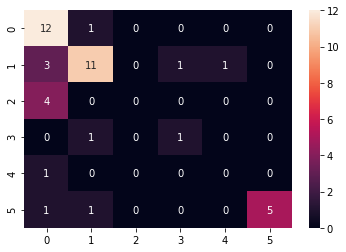

In [15]:
confusion_matrix_test=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix_test,annot=True)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.57      0.92      0.71        13
           2       0.79      0.69      0.73        16
           3       0.00      0.00      0.00         4
           5       0.50      0.50      0.50         2
           6       0.00      0.00      0.00         1
           7       1.00      0.71      0.83         7

    accuracy                           0.67        43
   macro avg       0.48      0.47      0.46        43
weighted avg       0.65      0.67      0.65        43



### Tweaking K value

In [17]:
for i in range(1,50,2):
    knn_model=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    y_pred=knn_model.predict(x_test)
    print('K value is: ',i)
    print(accuracy_score(y_test,y_pred))

K value is:  1
0.7906976744186046
K value is:  3
0.7906976744186046
K value is:  5
0.7209302325581395
K value is:  7
0.7441860465116279
K value is:  9
0.6976744186046512
K value is:  11
0.6744186046511628
K value is:  13
0.6976744186046512
K value is:  15
0.6976744186046512
K value is:  17
0.6976744186046512
K value is:  19
0.6976744186046512
K value is:  21
0.6744186046511628
K value is:  23
0.6511627906976745
K value is:  25
0.6511627906976745
K value is:  27
0.627906976744186
K value is:  29
0.627906976744186
K value is:  31
0.627906976744186
K value is:  33
0.6046511627906976
K value is:  35
0.6046511627906976
K value is:  37
0.6046511627906976
K value is:  39
0.6046511627906976
K value is:  41
0.627906976744186
K value is:  43
0.627906976744186
K value is:  45
0.6046511627906976
K value is:  47
0.6046511627906976
K value is:  49
0.6046511627906976


### Inference
* comparing from the above accuarcy score, model behave better for K values between 1 to 5

In [18]:
knn_model=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
print('K value is: ',3)
print(accuracy_score(y_test,y_pred))

K value is:  3
0.6046511627906976


In [19]:
knn_model=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
print('K value is: ',5)
print(accuracy_score(y_test,y_pred))

K value is:  5
0.6046511627906976
